In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading to data
df=pd.read_csv("Advertising.csv")
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
# check to null value
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

There is no null value hence go for EDA part

in this data i will consider of x and y value so (x=TV,radio,newspaper) and (y=sales),not work on unnamed value because this data is not impacting on this analysis

<AxesSubplot:xlabel='TV', ylabel='sales'>

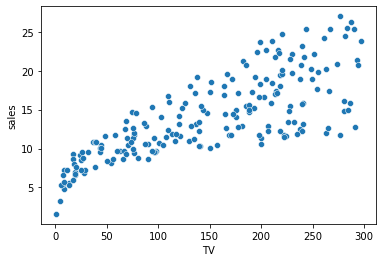

In [8]:
# we will use scatter plot to check the density of data
import seaborn as sns
sns.scatterplot(x='TV',y='sales',data=df)

<AxesSubplot:xlabel='radio', ylabel='sales'>

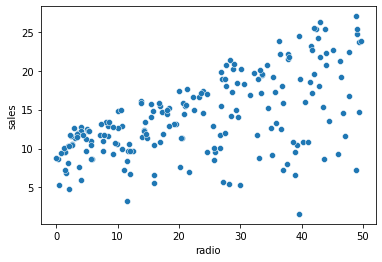

In [10]:
sns.scatterplot(x='radio',y='sales',data=df)

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

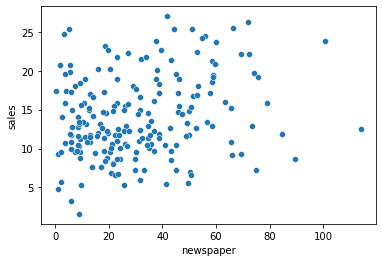

In [11]:
sns.scatterplot(x='newspaper',y='sales',data=df)

It shows that int he starting the strength is weak but is solidifies with the time and again it loses its strength.

In [13]:
# need to check correlation part to check the value of data are be  multicoliniarity or not
df.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

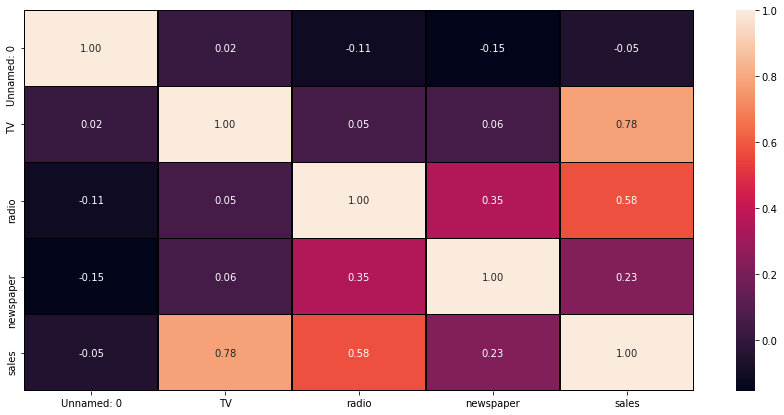

In [14]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True ,linewidths=0.5,linecolor='black',fmt='.2f')

# correlation:

from the above result it is clear that some columns making positive correlation rather than unnamed column

Columns Making Positive Correlation:

1:-TV
2:-radionewspaper
3:-sales

Columns Making Negative Correlation:

1:-Unnamed

The positively correlated columns has a great impact on the target column while the negative correlation has less or zero impact on the target column

In [17]:
# we will use describe function to check the stats of our data like mean,std,min,max etc
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


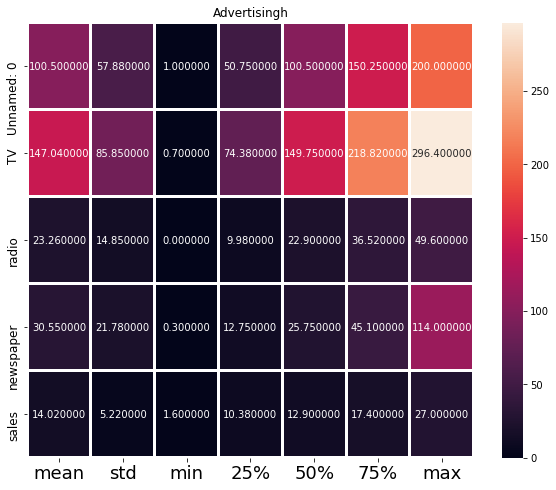

In [18]:
# check the describe part in heatmap format
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Advertisingh")
plt.show()

# Now use subplot and distplot to check data are normalised or not

<AxesSubplot:xlabel='TV', ylabel='Density'>

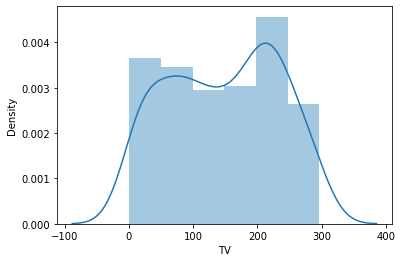

In [35]:
#we will check through plotting method for skew data
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.distplot(df['TV'])

<AxesSubplot:xlabel='radio', ylabel='Density'>

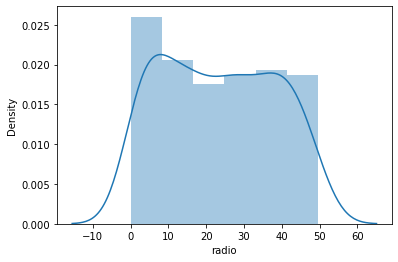

In [32]:
sns.distplot(df['radio'])

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

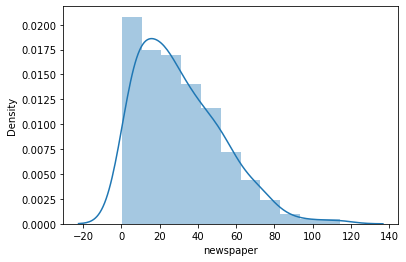

In [33]:
sns.distplot(df['newspaper'])

<AxesSubplot:xlabel='sales', ylabel='Density'>

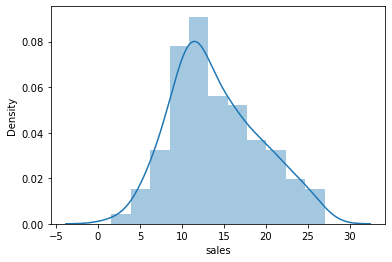

In [34]:
sns.distplot(df['sales'])

Observation:
    
From the above observation, it is clear to that the data are almost normalized and we should proceed with the data cleaning method

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'TV'}>],
       [<AxesSubplot:title={'center':'radio'}>,
        <AxesSubplot:title={'center':'newspaper'}>],
       [<AxesSubplot:title={'center':'sales'}>, <AxesSubplot:>]],
      dtype=object)

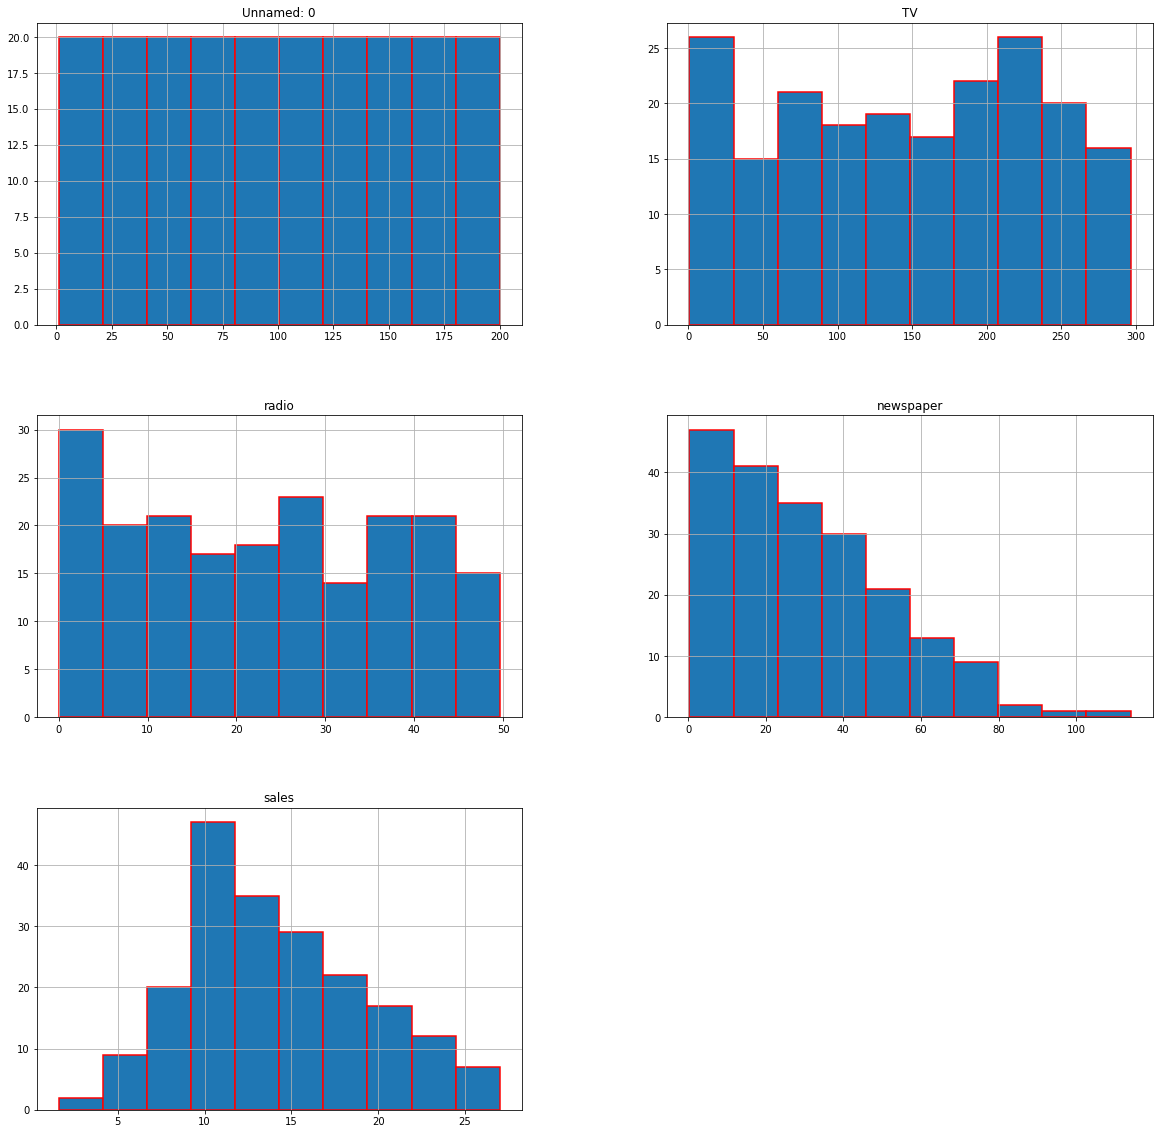

In [37]:
df.hist(edgecolor='red',linewidth=1.5,figsize=(20,20))

In [38]:
# here we can check skew of our data
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

skewness:
from the above observation the columns falls under normal skewness:

TV,skewness=-0.069853,radio=0.094175,newspaper=0.894720,sales=0.407571

some skewness are present so need to do Data Transformation

<AxesSubplot:>

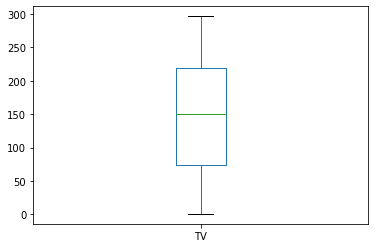

In [39]:
# outliers check
df['TV'].plot.box()

<AxesSubplot:>

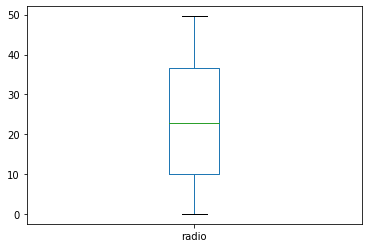

In [40]:
df['radio'].plot.box()

<AxesSubplot:>

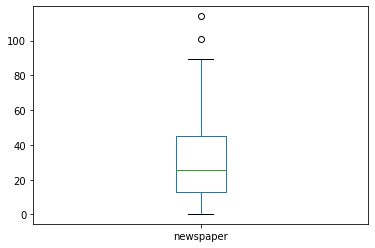

In [41]:
df['newspaper'].plot.box()

<AxesSubplot:>

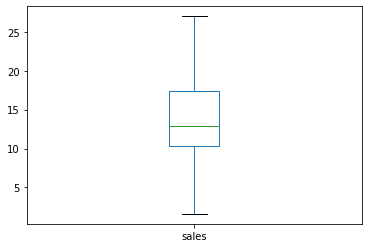

In [42]:
df['sales'].plot.box()

There is no data coming in skewness except newpaper.

# Removing outliers

Z-Score Technique

In [45]:
# applying zscore
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z

array([[1.72341210e+00, 9.69852266e-01, 9.81522472e-01, 1.77894547e+00,
        1.55205313e+00],
       [1.70609137e+00, 1.19737623e+00, 1.08280781e+00, 6.69578760e-01,
        6.96046111e-01],
       [1.68877065e+00, 1.51615499e+00, 1.52846331e+00, 1.78354865e+00,
        9.07405869e-01],
       [1.67144992e+00, 5.20496822e-02, 1.21785493e+00, 1.28640506e+00,
        8.60330287e-01],
       [1.65412920e+00, 3.94182198e-01, 8.41613655e-01, 1.28180188e+00,
        2.15683025e-01],
       [1.63680847e+00, 1.61540845e+00, 1.73103399e+00, 2.04592999e+00,
        1.31091086e+00],
       [1.61948775e+00, 1.04557682e+00, 6.43904671e-01, 3.24708413e-01,
        4.27042783e-01],
       [1.60216702e+00, 3.13436589e-01, 2.47406325e-01, 8.72486994e-01,
        1.58039455e-01],
       [1.58484630e+00, 1.61657614e+00, 1.42906863e+00, 1.36042422e+00,
        1.77205942e+00],
       [1.56752558e+00, 6.16042873e-01, 1.39530685e+00, 4.30581584e-01,
        6.57617064e-01],
       [1.55020485e+00, 9.4515

In [50]:
threshold=3
np.where(z>3)

(array([ 16, 101], dtype=int64), array([3, 3], dtype=int64))

In [52]:
df=df[(z<3).all(axis=1)]

In [53]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [54]:
df.shape

(198, 5)

# Percentage loss of data while removing outliers

In [55]:
percentage_loss = ((200-198)/200)*100
print(percentage_loss)

1.0


In [56]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [59]:
# need to check the x and y values.
x

,Unnamed: 0,TV,radio,newspaper
0,1,230.1,37.8,69.2
1,2,44.5,39.3,45.1
2,3,17.2,45.9,69.3
3,4,151.5,41.3,58.5
4,5,180.8,10.8,58.4
...,...,...,...,...
195,196,38.2,3.7,13.8
196,197,94.2,4.9,8.1
197,198,177.0,9.3,6.4
198,199,283.6,42.0,66.2


In [60]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 198, dtype: float64

# Removing skewness by transforming the data

In [61]:
# Removing skewness
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [62]:
x

array([[-2.08112123,  0.95598306,  0.9691098 ,  1.6041965 ],
       [-2.03541299, -1.19200349,  1.04623436,  0.83104401],
       [-1.99380721, -1.6461253 ,  1.37296802,  1.60705249],
       [-1.95500804,  0.14293428,  1.1473316 ,  1.28376774],
       [-1.91830818,  0.45645241, -0.73502642,  1.28062154],
       [-1.88326684, -1.8204008 ,  1.51543955,  1.76610727],
       [-1.84958541, -1.00349358,  0.70309642, -0.10205346],
       [-1.81704952, -0.20996049, -0.0876566 , -0.84968895],
       [-1.78549851, -1.82264543, -1.62948287, -2.09866461],
       [-1.754808  ,  0.652694  , -1.56152179, -0.22649933],
       [-1.72487914, -0.88482761, -1.19258569, -0.06553382],
       [-1.69563166,  0.80322028,  0.19357553, -1.59608414],
       [-1.66699926, -1.52567125,  0.82725998,  1.50859232],
       [-1.63892633, -0.48090308, -1.01613619, -1.23269654],
       [-1.61136564,  0.69642374,  0.70856268,  0.86367455],
       [-1.58427663,  0.60769456,  1.45886692,  1.1026083 ],
       [-1.53137745,  1.

In [63]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-2.08112123,  0.95598306,  0.9691098 ,  1.6041965 ],
       [-2.03541299, -1.19200349,  1.04623436,  0.83104401],
       [-1.99380721, -1.6461253 ,  1.37296802,  1.60705249],
       [-1.95500804,  0.14293428,  1.1473316 ,  1.28376774],
       [-1.91830818,  0.45645241, -0.73502642,  1.28062154],
       [-1.88326684, -1.8204008 ,  1.51543955,  1.76610727],
       [-1.84958541, -1.00349358,  0.70309642, -0.10205346],
       [-1.81704952, -0.20996049, -0.0876566 , -0.84968895],
       [-1.78549851, -1.82264543, -1.62948287, -2.09866461],
       [-1.754808  ,  0.652694  , -1.56152179, -0.22649933],
       [-1.72487914, -0.88482761, -1.19258569, -0.06553382],
       [-1.69563166,  0.80322028,  0.19357553, -1.59608414],
       [-1.66699926, -1.52567125,  0.82725998,  1.50859232],
       [-1.63892633, -0.48090308, -1.01613619, -1.23269654],
       [-1.61136564,  0.69642374,  0.70856268,  0.86367455],
       [-1.58427663,  0.60769456,  1.45886692,  1.1026083 ],
       [-1.53137745,  1.

Since the outcome has comtinuous variable hence we will use Linear Regression with classification.

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
from sklearn.metrics import accuracy_score

In [65]:
from sklearn.model_selection import train_test_split

In [73]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_t=sc.fit_transform(x)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score

In [78]:
max_scr=0
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)== round(r2_score(y_test,pred_test)*100,2):
        print("At random state",i," The model performs very well")
        print("At random_state:-",i)
        print("Training r2_score is:-", r2_score(y_train,pred_train)*100)
        print("Testing r2_score is:-", r2_score(y_test,pred_test)*100)

At random state 873  The model performs very well
At random_state:- 873
Training r2_score is:- 90.41308004886854
Testing r2_score is:- 90.40630959100888


In [79]:
x_train_b,x_test_b,y_train_b,y_test_b=train_test_split(x_t,y, random_state=873,test_size=0.20)

In [80]:
#we will use random state 873.


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# Regularization:

# 1.Lasso:

In [81]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [83]:
ls = Lasso(alpha=0.1,random_state=0)
ls.fit(x_train_b,y_train_b)
ls.score(x_train_b,y_train_b)
pred_ls = ls.predict(x_test_b)

lss = r2_score(y_test_b,pred_ls)
for j in range(2,10):
    lsscore = cross_val_score(ls,x_t,y,cv=j)
    lsc = lsscore.mean()
    print("At cv:-",j)
    print("Cross validation score is:-",lsc*100 )
    print("R2_score is :-",lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- 89.91076355172474
R2_score is :- 91.02374797536427


At cv:- 3
Cross validation score is:- 89.72351367252843
R2_score is :- 91.02374797536427


At cv:- 4
Cross validation score is:- 89.71454978979656
R2_score is :- 91.02374797536427


At cv:- 5
Cross validation score is:- 89.57805633532875
R2_score is :- 91.02374797536427


At cv:- 6
Cross validation score is:- 89.80608442859742
R2_score is :- 91.02374797536427


At cv:- 7
Cross validation score is:- 89.4530077204814
R2_score is :- 91.02374797536427


At cv:- 8
Cross validation score is:- 89.81744438200796
R2_score is :- 91.02374797536427


At cv:- 9
Cross validation score is:- 89.36471422956728
R2_score is :- 91.02374797536427




In [84]:
print("At cv:-",3)
print("Cross validation score is:-",89.72)
print("R_score is :-",91.02)

At cv:- 3
Cross validation score is:- 89.72
R_score is :- 91.02


The value of cv should be 3.

In [85]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

In [86]:
print('Error')

print('Mean Absolute Error:', mean_absolute_error(y_test_b,pred_ls))
print('Mean Squared Error:', mean_squared_error(y_test_b,pred_ls))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test_b,pred_ls)))

Error
Mean Absolute Error: 1.2103893795659293
Mean Squared Error: 2.3089411117299914
Root Mean Square Error: 1.5195200267617375


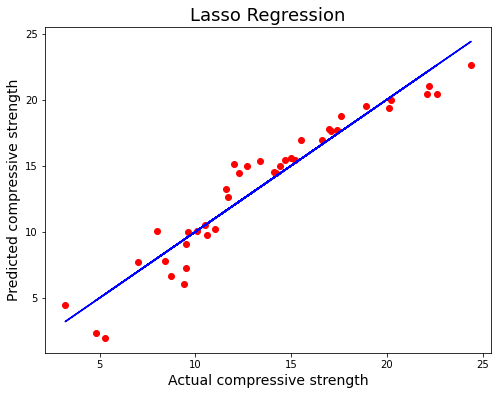

In [87]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_ls, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual compressive strength',fontsize=14)
plt.ylabel('Predicted compressive strength',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

# Ensemble Techniques:

In [101]:
from sklearn.tree import DecisionTreeRegressor

parameters = {'criterion':['mse', 'friedman_mse', 'mae'], 'splitter':['best','random']}
dt =DecisionTreeRegressor()
clf = GridSearchCV(dt,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

{'criterion': 'mae', 'splitter': 'random'}


In [102]:
dt = DecisionTreeRegressor(criterion='friedman_mse', splitter='best')
dt.fit(x_train_b,y_train_b)
dt.score(x_train_b,y_train_b)
pred_decision = dt.predict(x_test_b)

dts = r2_score(y_test_b,pred_decision)
print('R2 Score:',dts*100)

dtscore = cross_val_score(dt,x_t,y,cv=3)
dtc = dtscore.mean()
print('Cross Val Score:',dtc*100)

R2 Score: 93.15295492029922
Cross Val Score: 93.36066717258001


In [103]:
print('Error')

print('Mean Absolute Error:', mean_absolute_error(y_test_b,pred_decision))
print('Mean Squared Error:', mean_squared_error(y_test_b,pred_decision))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test_b,pred_decision)))

Error
Mean Absolute Error: 0.9975000000000002
Mean Squared Error: 1.76125
Root Mean Square Error: 1.3271209439986997


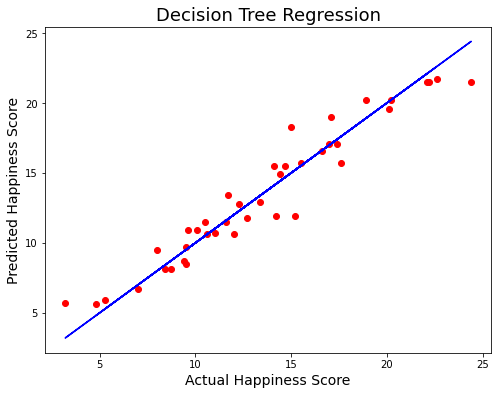

In [104]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_decision, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

In [105]:
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['friedman_mse', 'mae'],'n_estimators':[100,200,300]}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train_b,y_train_b)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

{'criterion': 'mae', 'n_estimators': 200}


In [130]:
rf = RandomForestRegressor(criterion='mae',n_estimators=200)
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b, y_train_b)
pred_random = rf.predict(x_test_b)

rfs = r2_score(y_test_b,pred_random)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x_t,y,cv=3)
rfc = rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score: 97.02732483664765
Cross Val Score: 97.08201346691378


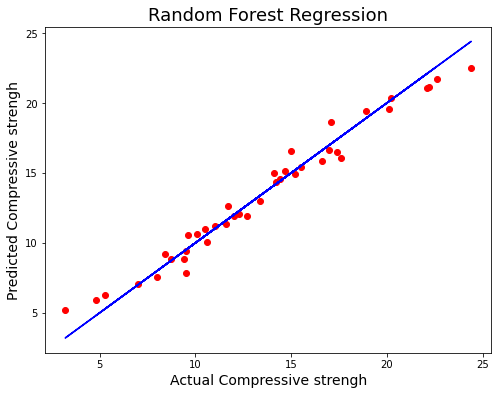

In [131]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_random, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Compressive strengh',fontsize=14)
plt.ylabel('Predicted Compressive strengh',fontsize=14)
plt.title('Random Forest Regression',fontsize=18)
plt.show()

In [113]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
parameters = {'loss':['ls','lad','huber','quantile'],'n_estimators':[50,100,200]}
gbr = GradientBoostingRegressor()
clf = GridSearchCV(gbr,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

{'loss': 'ls', 'n_estimators': 200}


In [114]:
gbr = GradientBoostingRegressor(criterion='friedman_mse',loss='huber',n_estimators=200)
gbr.fit(x_train_b,y_train_b)
gbr.score(x_train_b,y_train_b)
pred_random = rf.predict(x_test_b)

gbrs = r2_score(y_test_b,pred_random)
print('R2 Score:',gbrs*100)

gbscore = cross_val_score(gbr,x_t,y,cv=3)
gbrc= gbscore.mean()
print('Cross Val Score:',gbrc*100)

R2 Score: 96.96543797276925
Cross Val Score: 97.36710903163855


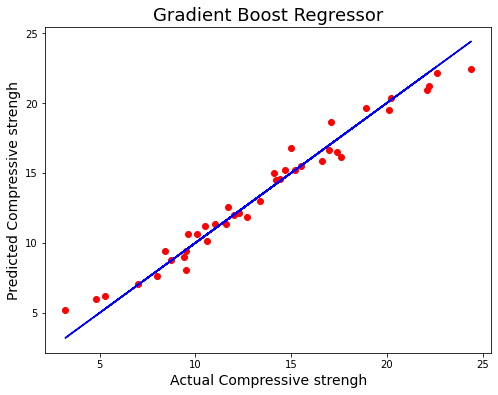

In [115]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_random, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Compressive strengh',fontsize=14)
plt.ylabel('Predicted Compressive strengh',fontsize=14)
plt.title('Gradient Boost Regressor',fontsize=18)
plt.show()

In [117]:
from sklearn.svm import SVR

parameters = {'kernel':['linear','poly','rbf','sigmoid']}  #'gamma':['auto','scale']
sv = SVR()
clf = GridSearchCV(sv,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

{'kernel': 'linear'}


In [118]:
sv = SVR(kernel = 'linear', gamma= 'auto')
sv.fit(x_train_b, y_train_b)
sv.score(x_train_b,y_train_b)
pred_vector = sv.predict(x_test_b)

svs = r2_score(y_test_b,pred_vector)
print('R2 Score:',svs*100)

svscore = cross_val_score(sv,x_t,y,cv=3)
svc = svscore.mean()
print('Cross Val Score:',svc*100)

R2 Score: 91.0705466318938
Cross Val Score: 88.5145499004134


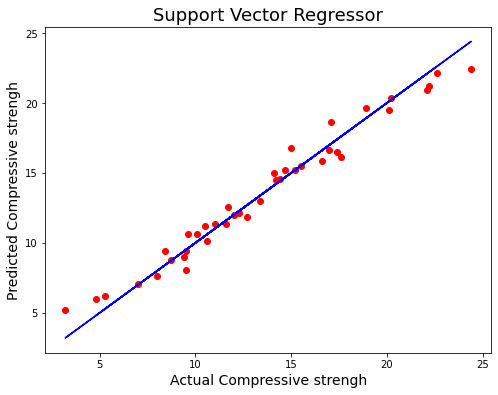

In [119]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_random, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Compressive strengh',fontsize=14)
plt.ylabel('Predicted Compressive strengh',fontsize=14)
plt.title('Support Vector Regressor',fontsize=18)
plt.show()

From the above observation it is clear that ensemble techniques overfits the model.



The best model is RandomForestRegression. Since the difference between the percentage score of cross validation and r2_score is optimum.

Random_Forest_Regression :-

R2 Score: 97.02732483664765

Cross Val Score: 97.08201346691378


In [121]:
#Model Saving

import pickle
filename = 'inadvertising.pkl'
pickle.dump(ls, open(filename, 'wb'))

# Conclusion:

In [123]:
import numpy as np
a=np.array(y_test)
a

array([13.4, 15. , 13.3, 20.7, 15.5,  8.8, 17.6, 15.5, 11.4, 20.1, 12.3,
        6.6, 24.4, 12.4, 10.4, 11.6,  8.6, 20.8, 15.6, 22.3, 17.2, 22.4,
        9.5, 18. , 14.7, 23.8,  6.6,  7.6, 17. ,  5.3, 14. , 15.9, 13.4,
       10.1, 21.5, 10.5, 16.6,  9.5, 16.6, 12.9])

In [127]:
predicted = np.array(ls.predict(x_test))
predicted

array([12.80928927, 17.81090924, 13.82764696, 20.22620595, 15.0860021 ,
        5.83039979, 18.76499336, 15.98112164, 12.52503747, 19.37226728,
       14.43361774,  6.6918827 , 22.61425967, 11.41613592,  9.15712637,
       13.24529939,  7.23526552, 20.76504497, 16.11840235, 20.71819479,
       16.9939814 , 20.35240648,  9.05911964, 17.55411724, 15.41372837,
       21.21632937,  9.44154966,  7.46850768, 17.75086412,  1.96205356,
       13.74485029, 15.90009258, 15.0158901 , 10.12536866, 20.31482898,
        9.79615705, 16.89762111,  7.29152717, 16.9262128 , 13.21881718])

In [128]:
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index=range(len(a)))

In [129]:
df_com

,original,predicted
0,13.4,12.809289
1,15.0,17.810909
2,13.3,13.827647
3,20.7,20.226206
4,15.5,15.086002
5,8.8,5.830400
6,17.6,18.764993
7,15.5,15.981122
8,11.4,12.525037
9,20.1,19.372267


# From the above table the model is predicted the value with 87-97 percent accuracy.